# Building Machine Learning Models from Scratch: Decision Trees, kNN, and Logistic Regression

## 1-Nearest Neighbor Classifier on a 2D Dataset

### Introduction
In this section, we implement a 1-Nearest Neighbor (1NN) classifier on a synthetic 2D dataset. 
We visualize how the classifier partitions the feature space based on the nearest neighbor's class label.

First 5 rows of the training dataset:
         X1        X2  Label
0 -0.333338 -0.087171      0
1 -1.531730  0.358194      1
2  1.549590 -0.364050      0
3 -1.349910  0.252063      1
4  1.283850 -0.531146      0


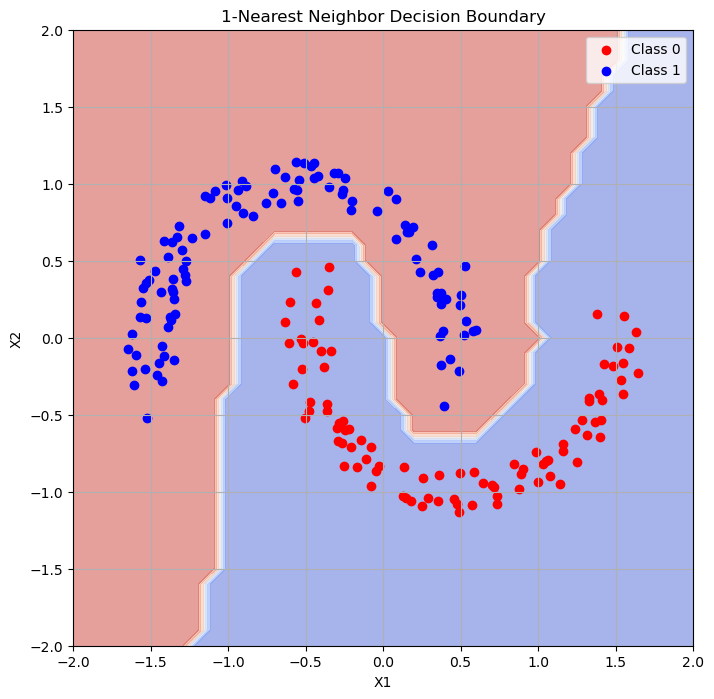

In [4]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Read the 2D dataset
D2z = pd.read_csv('C:\\Users\\dario\\OneDrive\\Documents\\GitHub\\ECE760-Homework\\Homework 3\\D2z.txt', sep=' ', header=None)
D2z.columns = ['X1', 'X2', 'Label']

# Display the first few rows of the dataset
print("First 5 rows of the training dataset:")
print(D2z.head())

# Create a grid of test points for visualization
x, y = np.meshgrid(np.arange(-2, 2.1, 0.1), np.arange(-2, 2.1, 0.1))
grid = np.c_[x.ravel(), y.ravel()]

# Perform 1NN classification for each point in the grid
predictions = []
for point in grid:
    D2z['Distance'] = np.sqrt((D2z['X1'] - point[0])**2 + (D2z['X2'] - point[1])**2)
    closest_point = D2z.loc[D2z['Distance'].idxmin()]
    predictions.append(closest_point['Label'])

# Reshape predictions to match the grid
predictions = np.array(predictions).reshape(x.shape)

# Plot the decision boundaries and training points
plt.figure(figsize=(8, 8))
plt.contourf(x, y, predictions, cmap='coolwarm', alpha=0.5)

# Separate data by label for better visualization
class0 = D2z[D2z['Label'] == 0]
class1 = D2z[D2z['Label'] == 1]

# Scatter plot for training points
plt.scatter(class0['X1'], class0['X2'], color='red', label='Class 0')
plt.scatter(class1['X1'], class1['X2'], color='blue', label='Class 1')

# Labels and legends
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('1-Nearest Neighbor Decision Boundary')
plt.legend()
plt.grid(True)
plt.show()

## Spam Detection with Logistic Regression and kNN

### Introduction
In this section, we build a spam detection model using two different approaches: 
k-Nearest Neighbors (kNN) and Logistic Regression. We evaluate both models on a large dataset of 5000 emails using 5-fold cross-validation.


In [6]:
# Load the dataset
emails = pd.read_csv('C:\\Users\\dario\\OneDrive\\Documents\\GitHub\\ECE760-Homework\\Homework 3\\emails.csv')
emails = emails.drop('Email No.', axis=1)

# Print the shape and first few rows of the dataset
print(f"Dataset Shape: {emails.shape}")
print("First 5 rows of the dataset:")
print(emails.head())

# Separate features and labels
X = emails.drop(columns=['Prediction']).values
y = emails['Prediction'].values

# 5-fold cross-validation splits
folds = [
    (np.arange(0, 1000), np.arange(1000, 5000)),
    (np.arange(1000, 2000), np.concatenate([np.arange(0, 1000), np.arange(2000, 5000)])),
    (np.arange(2000, 3000), np.concatenate([np.arange(0, 2000), np.arange(3000, 5000)])),
    (np.arange(3000, 4000), np.concatenate([np.arange(0, 3000), np.arange(4000, 5000)])),
    (np.arange(4000, 5000), np.arange(0, 4000))
]

# Implement 1NN from scratch for spam detection
def euclidean_distance(a, b):
    return np.sqrt(np.sum((a - b) ** 2, axis=1))

def predict_one(x_train, y_train, x_test_single):
    distances = euclidean_distance(x_train, x_test_single)
    nearest_y = y_train[np.argmin(distances)]
    return nearest_y

# Evaluate 1NN using 5-fold cross-validation
for i, (test_idx, train_idx) in enumerate(folds):
    X_train, y_train = X[train_idx], y[train_idx]
    X_test, y_test = X[test_idx], y[test_idx]
    predictions = np.array([predict_one(X_train, y_train, x_t) for x_t in X_test])
    accuracy = (predictions == y_test).mean()
    print(f'Fold {i+1} Accuracy: {accuracy:.4f}')

Dataset Shape: (5000, 3001)
First 5 rows of the dataset:
   the  to  ect  and  for  of    a  you  hou  in  ...  connevey  jay  valued  \
0    0   0    1    0    0   0    2    0    0   0  ...         0    0       0   
1    8  13   24    6    6   2  102    1   27  18  ...         0    0       0   
2    0   0    1    0    0   0    8    0    0   4  ...         0    0       0   
3    0   5   22    0    5   1   51    2   10   1  ...         0    0       0   
4    7   6   17    1    5   2   57    0    9   3  ...         0    0       0   

   lay  infrastructure  military  allowing  ff  dry  Prediction  
0    0               0         0         0   0    0           0  
1    0               0         0         0   1    0           0  
2    0               0         0         0   0    0           0  
3    0               0         0         0   0    0           0  
4    0               0         0         0   1    0           0  

[5 rows x 3001 columns]
Fold 1 Accuracy: 0.8250
Fold 2 Accuracy: 

## Logistic Regression Implementation from Scratch

In [8]:
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [9]:
# Define logistic regression helper functions
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def cost_function(y, y_pred):
    return (-1 / len(y)) * np.sum(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))

def gradient_descent(X, y, theta, alpha, iterations):
    m = len(y)
    for _ in range(iterations):
        predictions = sigmoid(np.dot(X, theta))
        errors = y - predictions
        gradient = np.dot(X.T, errors)
        theta += alpha * gradient
    return theta

# Initialize parameters and train logistic regression
alphas = [0.1, 0.01, 0.001]
theta = np.zeros(X.shape[1])

# Apply 5-fold cross-validation for different learning rates
for alpha in alphas:
    print(f"\nTesting with learning rate alpha={alpha}")
    for i, (test_idx, train_idx) in enumerate(folds):
        X_train, y_train = X[train_idx], y[train_idx]
        X_test, y_test = X[test_idx], y[test_idx]
        theta_optimal = gradient_descent(X_train, y_train, theta.copy(), alpha, iterations=1000)
        predictions = sigmoid(np.dot(X_test, theta_optimal)) >= 0.5
        accuracy = (predictions == y_test).mean()
        print(f'Fold {i+1} Accuracy: {accuracy:.4f}')


Testing with learning rate alpha=0.1
Fold 1 Accuracy: 0.9070
Fold 2 Accuracy: 0.8260
Fold 3 Accuracy: 0.7830
Fold 4 Accuracy: 0.8680
Fold 5 Accuracy: 0.8490

Testing with learning rate alpha=0.01
Fold 1 Accuracy: 0.9070
Fold 2 Accuracy: 0.8950
Fold 3 Accuracy: 0.8740
Fold 4 Accuracy: 0.8780
Fold 5 Accuracy: 0.8490

Testing with learning rate alpha=0.001
Fold 1 Accuracy: 0.9070
Fold 2 Accuracy: 0.8480
Fold 3 Accuracy: 0.8900
Fold 4 Accuracy: 0.8780
Fold 5 Accuracy: 0.8490


## Decision Tree Classifier from Scratch

### Introduction
In this section, we implement a Decision Tree from scratch, using Entropy, Information Gain, and Gain Ratio as criteria for splitting the nodes. The goal is to manually build the tree and visualize its structure.

In [11]:
# Import necessary libraries
import math

# Helper function to calculate entropy
def entropy(y_values):
    if len(y_values) == 0:
        return 0
    p = sum(y_values) / len(y_values)
    if p == 0 or p == 1:
        return 0
    return -p * math.log2(p) - (1 - p) * math.log2(1 - p)

# Helper function to calculate information gain
def information_gain(data, feature_index, threshold):
    y_values = [y for _, y in data]
    entropy_before = entropy(y_values)
    
    left_y = [y for x, y in data if x[feature_index] >= threshold]
    right_y = [y for x, y in data if x[feature_index] < threshold]

    p_left = len(left_y) / len(data)
    p_right = len(right_y) / len(data)

    entropy_after = p_left * entropy(left_y) + p_right * entropy(right_y)
    
    return entropy_before - entropy_after

# Helper function to calculate split information
def split_information(data, feature_index, threshold):
    left_y = [y for x, y in data if x[feature_index] >= threshold]
    right_y = [y for x, y in data if x[feature_index] < threshold]

    p_left = len(left_y) / len(data)
    p_right = len(right_y) / len(data)

    if p_left == 0 or p_right == 0:
        return 0
    
    return -p_left * math.log2(p_left) - p_right * math.log2(p_right)

# Helper function to calculate gain ratio
def gain_ratio(data, feature_index, threshold):
    gain = information_gain(data, feature_index, threshold)
    split_info = split_information(data, feature_index, threshold)
    return gain / split_info if split_info != 0 else 0

# Determine the best split for the given dataset
def best_split(data):
    best_gain_ratio = 0
    best_feature = None
    best_threshold = None

    for feature_index in [0, 1]:
        thresholds = set([x[feature_index] for x, _ in data])
        for threshold in thresholds:
            gain_ratio_val = gain_ratio(data, feature_index, threshold)
            if gain_ratio_val > best_gain_ratio:
                best_gain_ratio = gain_ratio_val
                best_feature = feature_index
                best_threshold = threshold

    return best_feature, best_threshold, best_gain_ratio

# Define a Node class for building the decision tree
class Node:
    def __init__(self, feature_index=None, threshold=None, left=None, right=None, value=None):
        self.feature_index = feature_index
        self.threshold = threshold
        self.left = left
        self.right = right
        self.value = value

# Recursive function to build the decision tree
def build_tree(data, depth=0):
    y_values = [y for _, y in data]

    # Stopping criteria: If no data or pure label
    if len(set(y_values)) == 1 or len(data) == 0:
        return Node(value=(1 if sum(y_values) / len(y_values) >= 0.5 else 0))
    
    # Determine the best split
    feature_index, threshold, gain = best_split(data)
    
    if gain == 0:  # If no information gain, make this a leaf node
        return Node(value=(1 if sum(y_values) / len(y_values) >= 0.5 else 0))
    
    # Split the data into left and right branches
    left_data = [d for d in data if d[0][feature_index] >= threshold]
    right_data = [d for d in data if d[0][feature_index] < threshold]

    # Recursively build the left and right branches
    left_node = build_tree(left_data, depth + 1)
    right_node = build_tree(right_data, depth + 1)

    return Node(feature_index, threshold, left_node, right_node)

# Function to print the tree structure
def print_tree(node, spacing=""):
    if node.value is not None:
        print(spacing + f"Predict: {node.value}")
        return

    print(spacing + f"Feature {node.feature_index} >= {node.threshold}?")
    print(spacing + '--> True:')
    print_tree(node.left, spacing + "  ")

    print(spacing + '--> False:')
    print_tree(node.right, spacing + "  ")

# Load synthetic dataset for decision tree
def load_data(filename):
    data = []
    with open(filename, 'r') as f:
        for line in f:
            x1, x2, y = map(float, line.strip().split())
            data.append(((x1, x2), int(y)))
    return data

# Load the data and build the decision tree
data = load_data("C:\\Users\\dario\\OneDrive\\Documents\\GitHub\\ECE760-Homework\\Homework 2\\Druns.txt")
decision_tree = build_tree(data)

# Print the resulting decision tree
print("Decision Tree Structure:")
print_tree(decision_tree)

Decision Tree Structure:
Feature 1 >= 8.0?
--> True:
  Predict: 1
--> False:
  Feature 1 >= 0.0?
  --> True:
    Feature 1 >= 6.0?
    --> True:
      Feature 1 >= 7.0?
      --> True:
        Predict: 0
      --> False:
        Predict: 1
    --> False:
      Predict: 0
  --> False:
    Feature 0 >= 0.1?
    --> True:
      Predict: 0
    --> False:
      Predict: 1


## Summary and Conclusions
This notebook demonstrated building three fundamental machine learning models from scratch: 
 - 1-Nearest Neighbor (1NN) for simple binary classification
 - Logistic Regression using gradient descent
 - Decision Tree using entropy and information gain criteria
 
Each model was evaluated on different datasets, and their performances were compared using metrics such as accuracy.
This project provided an in-depth understanding of how each algorithm operates and the challenges involved in implementing these from scratch.